
# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### 02 - Getting Data

- Read the `.csv` file.

In [2]:
#reading csv file
mca=pd.read_csv("marketing_customer_analysis.csv")

#emergency copy
mca_copy = mca.copy()

mca.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [3]:
#checking the header names 
mca.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
#standardise to lower case 
mca.columns = mca.columns.str.lower()

#rename employmentstatus to employment status 
mca = mca.rename(columns={'employmentstatus':'employment status'})

In [5]:
mca.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [6]:
#find null values (sum of null values) 
mca.isnull().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [7]:
#getting data on all the objects
mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [8]:
#selecting numeric ones
mca.select_dtypes('number')

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### checking correlation with and without "total claim amount"

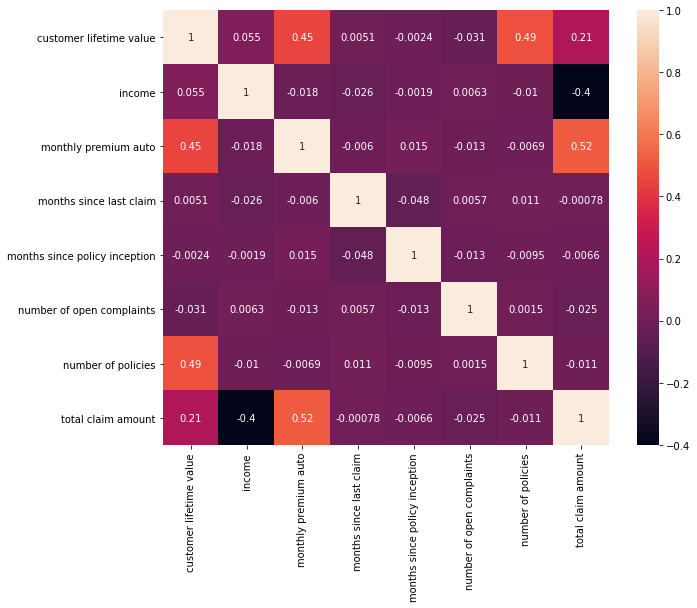

In [9]:
#with "total claim amount"
#spearman measures linear & non-linear relations
corr_matrix = mca.select_dtypes(include = 'number').corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

the data that is almost not correlated to total claim amount: 
- months since last claim
- months since policy inception 

could try dropping those 


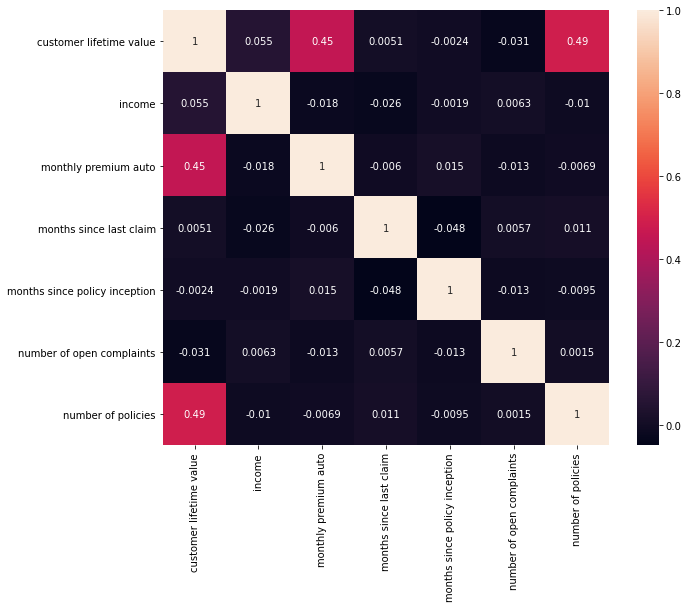

In [10]:
#without "total claim amount"

x = mca.drop('total claim amount', axis = 1)
data_n = x.select_dtypes(include = 'number')


corr_matrix = data_n.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

High correlations:

1. customer lifetime value - monthly premium auto
2. customer lifetime value - number of policies 

Total claim amount is highly correlated with monthly premium auto 
=> we could try dropping: 
customer lifetime value

will test that later 

In [11]:
#selecting categorical ones
mca.select_dtypes('object')

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
#dropping unnesessary data - "effective to date","customer", "response"
mca = mca.drop(['customer', 'effective to date', 'response'], axis = 1)

In [13]:
mca.head()

,state,customer lifetime value,coverage,education,employment status,gender,income,location code,marital status,monthly premium auto,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,Washington,2763.519279,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

#### - Dealing with outliers.

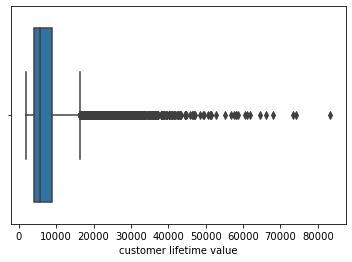

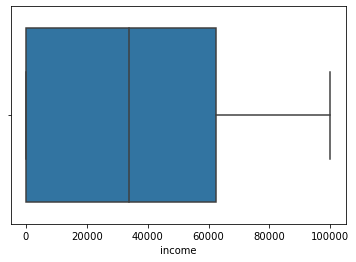

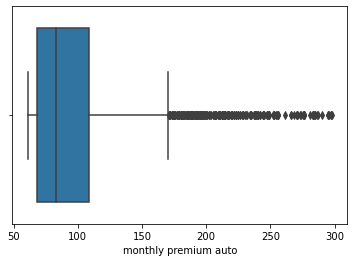

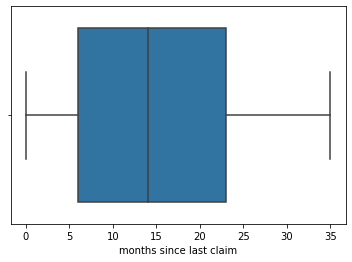

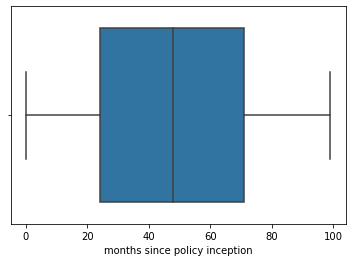

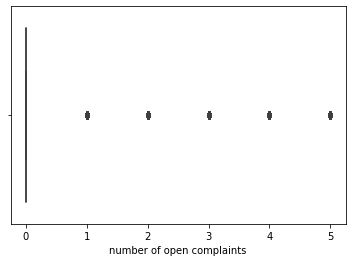

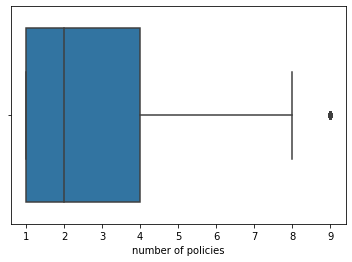

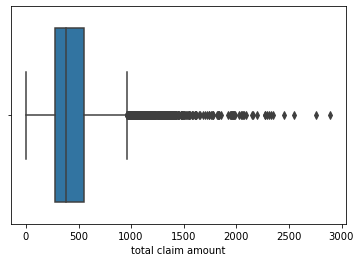

In [14]:
#plot all numerical data 

data_n = mca.select_dtypes(include = 'number')
columns = data_n.columns

for i in range(len(columns)):
    ax = sns.boxplot(x=data_n[columns[i]])
    plt.show()
    

In [15]:
# function to calculate the percentage of outliers: 
# input-dataframe with numerica lcolumns that you want to check

def calc_outliers(data):

    #list with all the column names
    cols = data.columns

    for i in range(len(cols)):
        Q1 = np.quantile(data[cols[i]],0.25)
        Q3 = np.quantile(data[cols[i]],0.75)
        out_border_high = Q3+1.5*(Q3-Q1)
        out_border_low = Q1-1.5*(Q3-Q1)
        
        out_index = data[(data[cols[i]] < out_border_low) | (data[cols[i]] > out_border_high)].index
        
        print("Number of outliers for", cols[i],':', len(out_index))
    
    return



In [16]:
#checking all numerical data to quantity of outliers 
calc_outliers(data_n)

Number of outliers for customer lifetime value : 817
Number of outliers for income : 0
Number of outliers for monthly premium auto : 430
Number of outliers for months since last claim : 0
Number of outliers for months since policy inception : 0
Number of outliers for number of open complaints : 1882
Number of outliers for number of policies : 416
Number of outliers for total claim amount : 453


 Too many outiers, won't drop anything at this point

#### - Normalization.

In [17]:
#prior normalisation - splitting x & y
y = mca['total claim amount']
x = mca.drop(['total claim amount', 'months since last claim', 'months since policy inception'], axis = 1)
x.head()


,state,customer lifetime value,coverage,education,employment status,gender,income,location code,marital status,monthly premium auto,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,2763.519279,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,Basic,Bachelor,Employed,M,43836,Rural,Single,73,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


column >> customer lifetime value
skew 3.0317822713278852
kurtosis 13.815310695287444


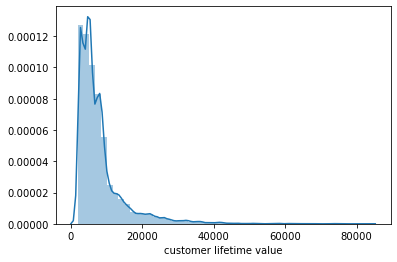

column >> income
skew 0.28684016057807576
kurtosis -1.094383828097193


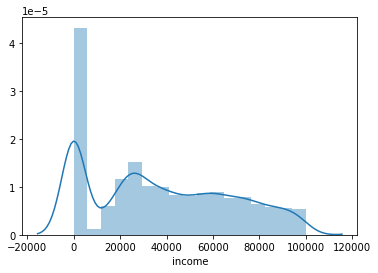

column >> monthly premium auto
skew 2.123197701864424
kurtosis 6.189558258832852


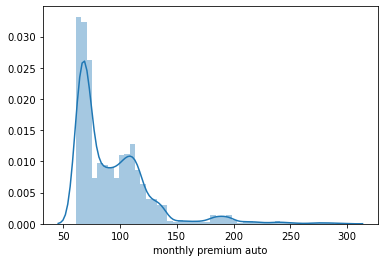

column >> number of open complaints
skew 2.7828059596647505
kurtosis 7.744410297233042


/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


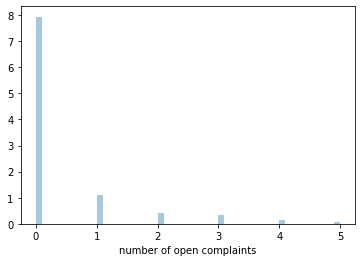

column >> number of policies
skew 1.2531269015899718
kurtosis 0.36230101435395934


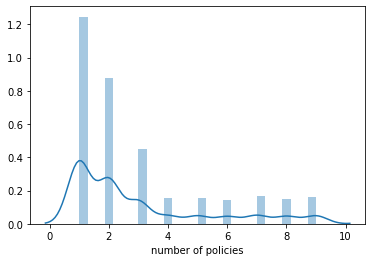

In [18]:
#pulling numerical data from x for normalisation 

data_n = x.select_dtypes(include = 'number')

# plotting all the numerical graphs
# checking skew & kurtosis

from scipy.stats import skew
from scipy.stats import kurtosis

cols = data_n.columns

for i in range(len(cols)):
    print('column >>', cols[i])
    print('skew {}'.format(skew(data_n[cols[i]])))
    print('kurtosis {}'.format(kurtosis(data_n[cols[i]])))
    #{} - what would be shown after.  format expects 
    sns.distplot(data_n[cols[i]])
    plt.show()
    

plt.show()
    

In [19]:
#normalising numerical data
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(data_n)
data_n_normalised = transformer.transform(data_n)

In [20]:
#returning notmalised data back to dataframe tyoe
data_n_normalised
data_n = pd.DataFrame(data_n_normalised)

type(data_n)

pandas.core.frame.DataFrame

In [21]:
data_n.head()

,0,1,2,3,4
0,0.049049,0.998796,0.001225,0.0,0.000018
1,0.999909,0.000000,0.013467,0.0,0.001146
2,0.255494,0.966808,0.002141,0.0,0.000040
3,0.999903,0.000000,0.013862,0.0,0.000915
4,0.064055,0.997945,0.001662,0.0,0.000023


In [22]:
#renaming the columns
data_n.rename(columns = {0:'customer lifetime value',1:'income',2:'monthly premium auto',
       3:'number of open complaints', 4:'number of policies'}, inplace=True)
data_n.head()


,customer lifetime value,income,monthly premium auto,number of open complaints,number of policies
0,0.049049,0.998796,0.001225,0.0,0.000018
1,0.999909,0.000000,0.013467,0.0,0.001146
2,0.255494,0.966808,0.002141,0.0,0.000040
3,0.999903,0.000000,0.013862,0.0,0.000915
4,0.064055,0.997945,0.001662,0.0,0.000023


column >> customer lifetime value
skew 0.792424543835031
kurtosis -1.131399323837959


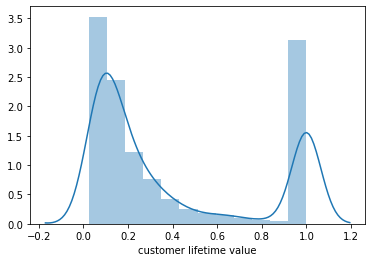

column >> income
skew -1.0743616208054616
kurtosis -0.7913929289255659


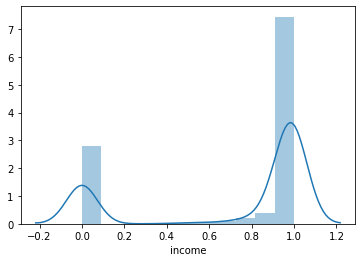

column >> monthly premium auto
skew 1.945660246088703
kurtosis 2.7325399247386164


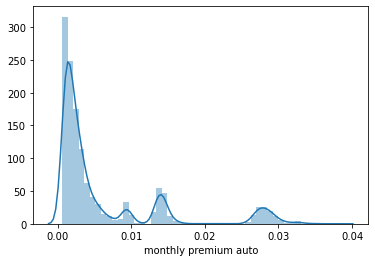

column >> number of open complaints
skew 8.576446585803186
kurtosis 91.89538082343938


/Users/annakharchenkova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


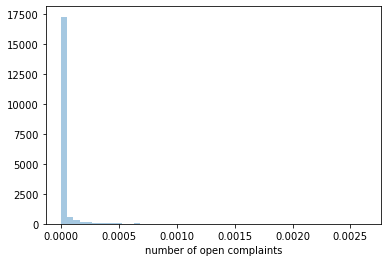

column >> number of policies
skew 3.1820950570546076
kurtosis 11.767134344940613


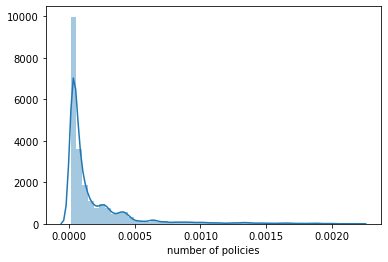

In [23]:
# plotting normalised data 

cols = data_n.columns

for i in range(len(cols)):
    print('column >>', cols[i])
    print('skew {}'.format(skew(data_n[cols[i]])))
    print('kurtosis {}'.format(kurtosis(data_n[cols[i]])))
    sns.distplot(data_n[cols[i]])
    plt.show()
   



In [24]:
data_n.describe()

,customer lifetime value,income,monthly premium auto,number of open complaints,number of policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.395459,0.720574,0.006123,0.000031,0.000185
std,0.379467,0.424646,0.007974,0.000142,0.000292
min,0.024837,0.000000,0.000610,0.000000,0.000010
25%,0.095647,0.000000,0.001398,0.000000,0.000031
50%,0.197416,0.980315,0.002516,0.000000,0.000069
75%,0.999477,0.995413,0.006260,0.000000,0.000220
max,0.999996,0.999691,0.038263,0.002632,0.002188


#### - Encoding Categorical Data.


In [25]:
#creating a df with categorical data only
data_cat = x.select_dtypes(include = "object")
data_cat.head()

,state,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [26]:
#checking amount of unique values in categorical 
column_cat = data_cat.columns

for i in range(0,len(column_cat)): 
    print(data_cat[column_cat[i]].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [27]:
# concatinating numerical and categorical into one

x = pd.concat([data_n,data_cat], axis = 1)
x.head()

,customer lifetime value,income,monthly premium auto,number of open complaints,number of policies,state,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,0.049049,0.998796,0.001225,0.0,0.000018,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,0.999909,0.000000,0.013467,0.0,0.001146,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,0.255494,0.966808,0.002141,0.0,0.000040,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,0.999903,0.000000,0.013862,0.0,0.000915,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,0.064055,0.997945,0.001662,0.0,0.000023,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [28]:
x.shape

(9134, 18)

In [29]:
#transforming categorical data

x = pd.get_dummies(x, drop_first = True)
x.head()

,customer lifetime value,income,monthly premium auto,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Extended,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.049049,0.998796,0.001225,0.0,0.000018,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0.999909,0.000000,0.013467,0.0,0.001146,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.255494,0.966808,0.002141,0.0,0.000040,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.999903,0.000000,0.013862,0.0,0.000915,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.064055,0.997945,0.001662,0.0,0.000023,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
x.shape

(9134, 47)

### 05 - Modeling

- Apply model.

#### - Splitting into train set and test set + Apply linear regression.

In [31]:
#importing linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def apply_linear(x,y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 1628)
    
    model = LinearRegression()
    #training - providing answers to the model
    lm = model.fit(X_train, Y_train)

    #generating predictions with the model
    predictions = lm.predict(X_test)
    
    #diff between my prediction and real value 
    residuals = predictions - Y_test
    
    return residuals, predictions, Y_test


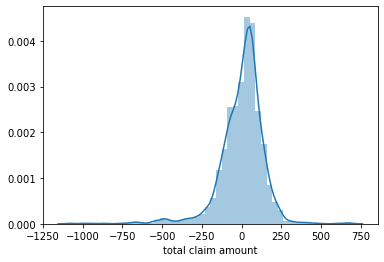

In [32]:
result = apply_linear(x,y)

#result is a tuple - 
residuals = result[0]
predictions = result[1]
Y_test = result[2]

#check wherther its normally distributed 
sns.distplot(residuals)

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [33]:
#importing values we need 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def model_val(Y_test, predictions):
    MAE = mean_absolute_error(Y_test, predictions)
    MSE = mean_squared_error(Y_test, predictions)
    R2 = r2_score(Y_test, predictions)
    RMSE = sqrt(mean_squared_error(Y_test, predictions))

    #print all of them  
    print('MAE = ', MAE)
    print('MSE = ', MSE)
    print('R2 = ', R2)
    print('RMSE = ', RMSE)
    return

In [34]:
model_val(Y_test, predictions)

MAE =  96.8479195531127
MSE =  19874.2479867272
R2 =  0.7567802838093083
RMSE =  140.97605465726156


### 07 - Changing parameters  

#### 07.1 - Dropping columns
We'll drop "customer lifetime valie" and see what happens 

In [35]:
#dropping the column
x = x.drop("customer lifetime value", axis = 1)
x

,income,monthly premium auto,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Extended,coverage_Premium,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.998796,0.001225,0.000000,0.000018,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.000000,0.013467,0.000000,0.001146,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.966808,0.002141,0.000000,0.000040,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0.000000,0.013862,0.000000,0.000915,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.997945,0.001662,0.000000,0.000023,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.950936,0.000965,0.000000,0.000026,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0.989877,0.003620,0.000000,0.000046,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9131,0.000000,0.010411,0.000367,0.000245,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9132,0.945914,0.004139,0.000000,0.000129,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


MAE =  96.91591669871883
MSE =  19892.982383796974
R2 =  0.756551013512321
RMSE =  141.04248432226714


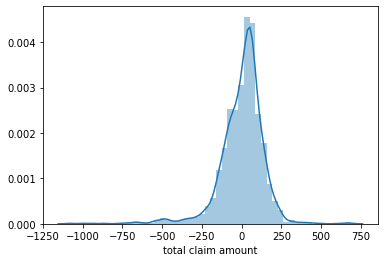

In [36]:
result = apply_linear(x,y)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

sns.distplot(residuals)
model_val(Y_test, predictions)

Did absolutely nothing, good that we dropped it.

#### 07.2 - Looking at income

income has strong negative correlation to total claim account.
splitting data into 2 sets - 
income = 0
income > 0 
and generate two different models 

In [37]:
x_income_z = x['income']    
#index_z = data[('income') == 0].index
x_income_z

0       0.998796
1       0.000000
2       0.966808
3       0.000000
4       0.997945
          ...   
9129    0.950936
9130    0.989877
9131    0.000000
9132    0.945914
9133    0.000000
Name: income, Length: 9134, dtype: float64

In [38]:
x

,income,monthly premium auto,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Extended,coverage_Premium,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.998796,0.001225,0.000000,0.000018,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.000000,0.013467,0.000000,0.001146,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.966808,0.002141,0.000000,0.000040,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0.000000,0.013862,0.000000,0.000915,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.997945,0.001662,0.000000,0.000023,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.950936,0.000965,0.000000,0.000026,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0.989877,0.003620,0.000000,0.000046,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9131,0.000000,0.010411,0.000367,0.000245,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9132,0.945914,0.004139,0.000000,0.000129,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
#dataframe with income > 0
x_nz = x[(x['income']) > 0]
index_nz = x_nz.index
x_nz.index
print(x_nz.shape)

y = pd.DataFrame(y)
y_nz = y.loc[index_nz]
y_nz

(6817, 46)


,total claim amount
0,384.811147
2,566.472247
4,138.130879
5,159.383042
6,321.600000
...,...
9127,307.200000
9128,541.282007
9129,198.234764
9130,379.200000


MAE =  76.10771153916848
MSE =  12231.52708854466
R2 =  0.7958991534465447
RMSE =  110.59623451340765


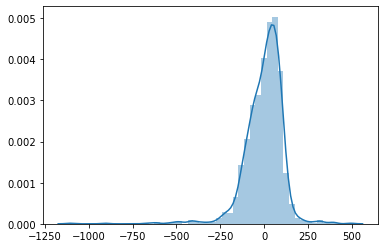

In [40]:
#x_nz = x_nz.reset_index()
#y_nz = y_nz.reset_index()

#x_nz = x_nz.drop('index', axis = 1)
#y_nz = y_nz.drop('index', axis = 1)

#Resetting the index reduces error a lot, but creating an additional 
#identical column (which is not being dropped) ??

result = apply_linear(x_nz,y_nz)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

sns.distplot(residuals)
model_val(Y_test, predictions)

yay! Error is redused a biy withou resetting the index also.

Now will try for income = 0

In [45]:
#dataframe with income = 0
x_z = x[(x['income']) == 0]
index_z = x_z.index
x_z.index
print(x_z.shape)

x_z = x_z.drop('income', axis = 1)

y = pd.DataFrame(y)
y_z = y.loc[index_z]
y_z

(2317, 46)


,total claim amount
1,1131.464935
3,529.881344
7,363.029680
10,482.400000
11,528.000000
...,...
9123,364.800000
9125,1950.725547
9126,482.400000
9131,790.784983


MAE =  130.63490870689654
MSE =  34005.16815216082
R2 =  0.6805338286750862
RMSE =  184.404902733525


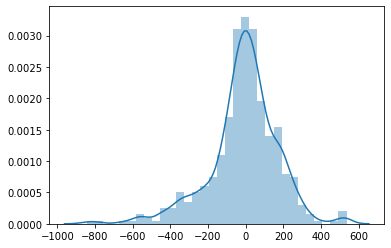

In [46]:
#x_z = x_z.reset_index()
#y_z = y_z.reset_index()

#x_z = x_z.drop('index', axis = 1)
#y_z = y_z.drop('index', axis = 1)

#index reset doesn't influence results of error here

result = apply_linear(x_z,y_z)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

sns.distplot(residuals)
model_val(Y_test, predictions)

For Income = 0, the error is much bigger

In [47]:
x_z

,monthly premium auto,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Extended,coverage_Premium,education_College,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
1,0.013467,0.000000,0.001146,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.013862,0.000000,0.000915,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
7,0.013995,0.000000,0.000554,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
10,0.014137,0.000000,0.000633,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11,0.013418,0.000000,0.000366,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9123,0.013384,0.000000,0.000528,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9125,0.009309,0.000000,0.000101,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9126,0.014472,0.000000,0.000864,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
9131,0.010411,0.000367,0.000245,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


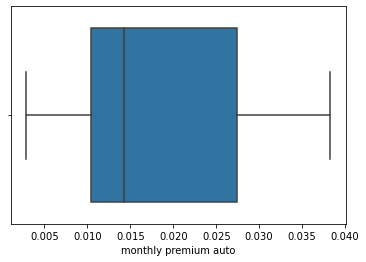

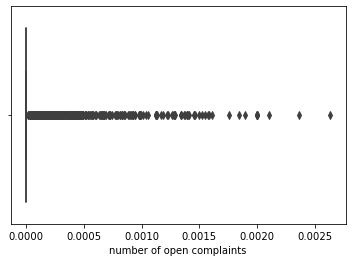

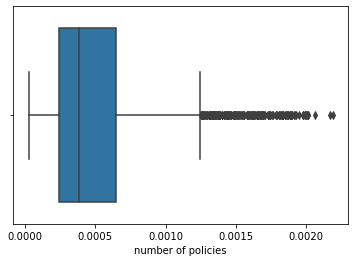

In [51]:
columns = x_z.columns

for i in range(0,3):
    ax = sns.boxplot(x=x_z[columns[i]])
    plt.show()

In [55]:
calc_outliers(x_z[['monthly premium auto', 'number of open complaints', 'number of policies']])

Number of outliers for monthly premium auto : 0
Number of outliers for number of open complaints : 475
Number of outliers for number of policies : 202


Too many outliers to delete

#### 07.3 - Tweaking categorical data 

Splitting car categories into luxury & standard 

In [69]:
#checking amount of unique values in categorical 
column_cat = data_cat.columns
print(data_cat['vehicle class'].unique())

x = pd.concat([data_n,data_cat], axis = 1)

#replace("CALI","CA").replac
x[['vehicle class']] = x[['vehicle class']].replace('Two-Door Car','Standard').replace('Four-Door Car','Standard').replace('SUV','Standard').replace('Luxury SUV','Luxury').replace('Sports Car','Luxury').replace('Luxury Car','Luxury')

x

['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


,customer lifetime value,income,monthly premium auto,number of open complaints,number of policies,state,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,0.049049,0.998796,0.001225,0.000000,0.000018,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Standard,Medsize
1,0.999909,0.000000,0.013467,0.000000,0.001146,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Standard,Medsize
2,0.255494,0.966808,0.002141,0.000000,0.000040,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Standard,Medsize
3,0.999903,0.000000,0.013862,0.000000,0.000915,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,Standard,Medsize
4,0.064055,0.997945,0.001662,0.000000,0.000023,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Standard,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.309387,0.950936,0.000965,0.000000,0.000026,California,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Standard,Medsize
9130,0.141880,0.989877,0.003620,0.000000,0.000046,California,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Standard,Medsize
9131,0.999946,0.000000,0.010411,0.000367,0.000245,California,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Standard,Medsize
9132,0.324392,0.945914,0.004139,0.000000,0.000129,California,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Standard,Large


In [70]:
#transforming categorical data

x = pd.get_dummies(x, drop_first = True)
x

,customer lifetime value,income,monthly premium auto,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,state_Washington,coverage_Extended,...,policy_Special L3,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Standard,vehicle size_Medsize,vehicle size_Small
0,0.049049,0.998796,0.001225,0.000000,0.000018,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0.999909,0.000000,0.013467,0.000000,0.001146,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,0.255494,0.966808,0.002141,0.000000,0.000040,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.999903,0.000000,0.013862,0.000000,0.000915,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4,0.064055,0.997945,0.001662,0.000000,0.000023,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.309387,0.950936,0.000965,0.000000,0.000026,1,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
9130,0.141880,0.989877,0.003620,0.000000,0.000046,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
9131,0.999946,0.000000,0.010411,0.000367,0.000245,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
9132,0.324392,0.945914,0.004139,0.000000,0.000129,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0


MAE =  123.37660581794756
MSE =  31112.003263176175
R2 =  0.6192533871547161
RMSE =  176.3859497328973


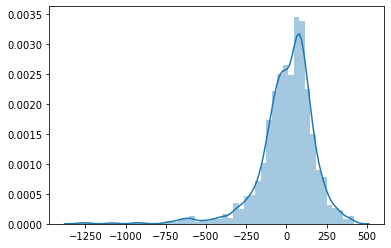

In [71]:
result = apply_linear(x,y)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

sns.distplot(residuals)
model_val(Y_test, predictions)

Nope :)